# TensorFlow Core Learning Algorithms
* Linear Regression
* Classification
* Clustering
* Hidden Markov Models

## Linear Regression
Linear Regression is one of the most basic form of machine learning and is used to predict numerical values. In the below example we will use linear model to predict the survival rate of passengers from the titanic dataset.
[Link](https://www.tensorflow.org/tutorials/estimator/linear)

[0, 6, 0, 20]

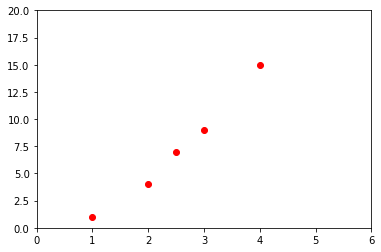

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

We can see that this data has a linear characteristics. When the x value increases, y also increases. We can fit the dataset with a line.
"Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between the points." [Link](https://www.investopedia.com/terms/l/line-of-best-fit.asp)
`y = mx + b`

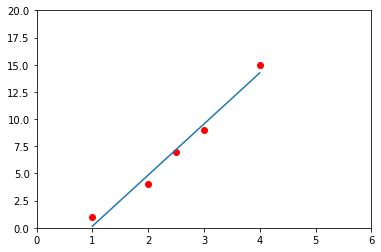

In [2]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

Once we have generated the line for the dataset, we can use it's equation to predict future values.

# Setup and Imports
Setup and imports for the titanic data set.

In [3]:
!pip install -q sklearn

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [5]:
# Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Training dataset
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [6]:
# Printing one specific row from a dataset
print(dftrain.loc[0])

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [7]:
print(dftrain.describe())

              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000000   31.387500
max     80.000000            8.000000    5.000000  512.329200


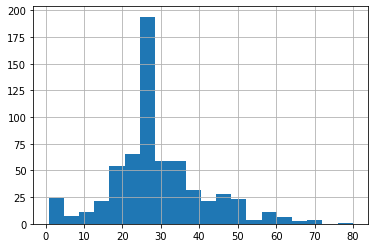

In [8]:
dftrain.age.hist(bins =20)

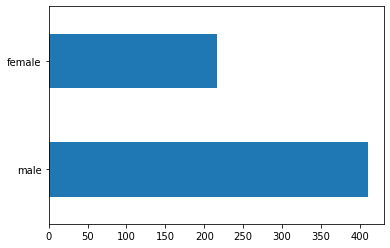

In [9]:
dftrain.sex.value_counts().plot(kind='barh')

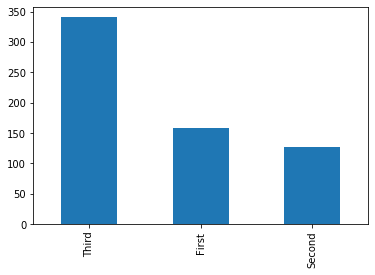

In [10]:
dftrain['class'].value_counts().plot(kind='bar')

Text(0.5, 0, '% survived')

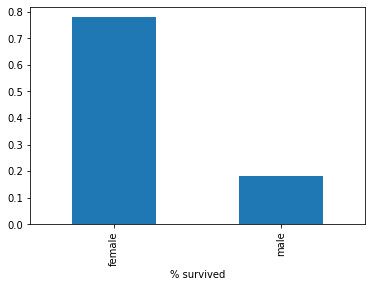

In [11]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='bar').set_xlabel('% survived')

After analyzing this information it can be observed that
* The majority of passengers were in their 20 - 30s
* The majority of passengers were male
* The majority of passengers were in 'Third' class
* Females survived much higher compared to men.

Now to perform some actual data science

In [12]:
CAT_COL = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUM_COL = ['age', 'fare']
feature_columns = []
for feature in CAT_COL:
    vocab = dftrain[feature].unique() # get a list of unique values from given feature column.
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature, vocab))
    
for feature in NUM_COL:
    feature_columns.append(tf.feature_column.numeric_column(feature, dtype=tf.float32))


# Training Process
We feed the data points from our datasets. Load data in baches of 32 entries to increase speed and maintain load on the system. 

**Epochs** How many times the model is going to see same data. Do the same things multiple times to see some kind of pattern. If we pass the same data too much times, it can lead to overfitting.

# Input Function
The TensorFlow model we are going to use require that the data we pass it comes in a ```tf.data.Dataset``` object. We need to create an input function which can do this.

In [13]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval)

# Creating a Model
Use a linear estimator to utilize the linear regression algorithm.

In [14]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\udpsu\\AppData\\Local\\Temp\\tmpjai8b0nt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training the Model
Use the estimator created above and call training method on it with training input function (Dataset)

In [16]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

0.7613636


# Predicting

In [18]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(result[4]['probabilities'])
print(y_eval.loc[4])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\udpsu\AppData\Local\Temp\tmpjai8b0nt\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                            34
n_siblings_spouses              0
parch                           0
fare                           13
class                      Second
deck    